In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import warnings
import missingno as msno
from statistics import mode


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../Data/train.csv", low_memory=False)
# remove redundant features
df.drop(columns=['ID', 'Name', 'SSN'], inplace=True)

In [3]:
df1 = df.copy()

In [4]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Check for missing values

<AxesSubplot:>

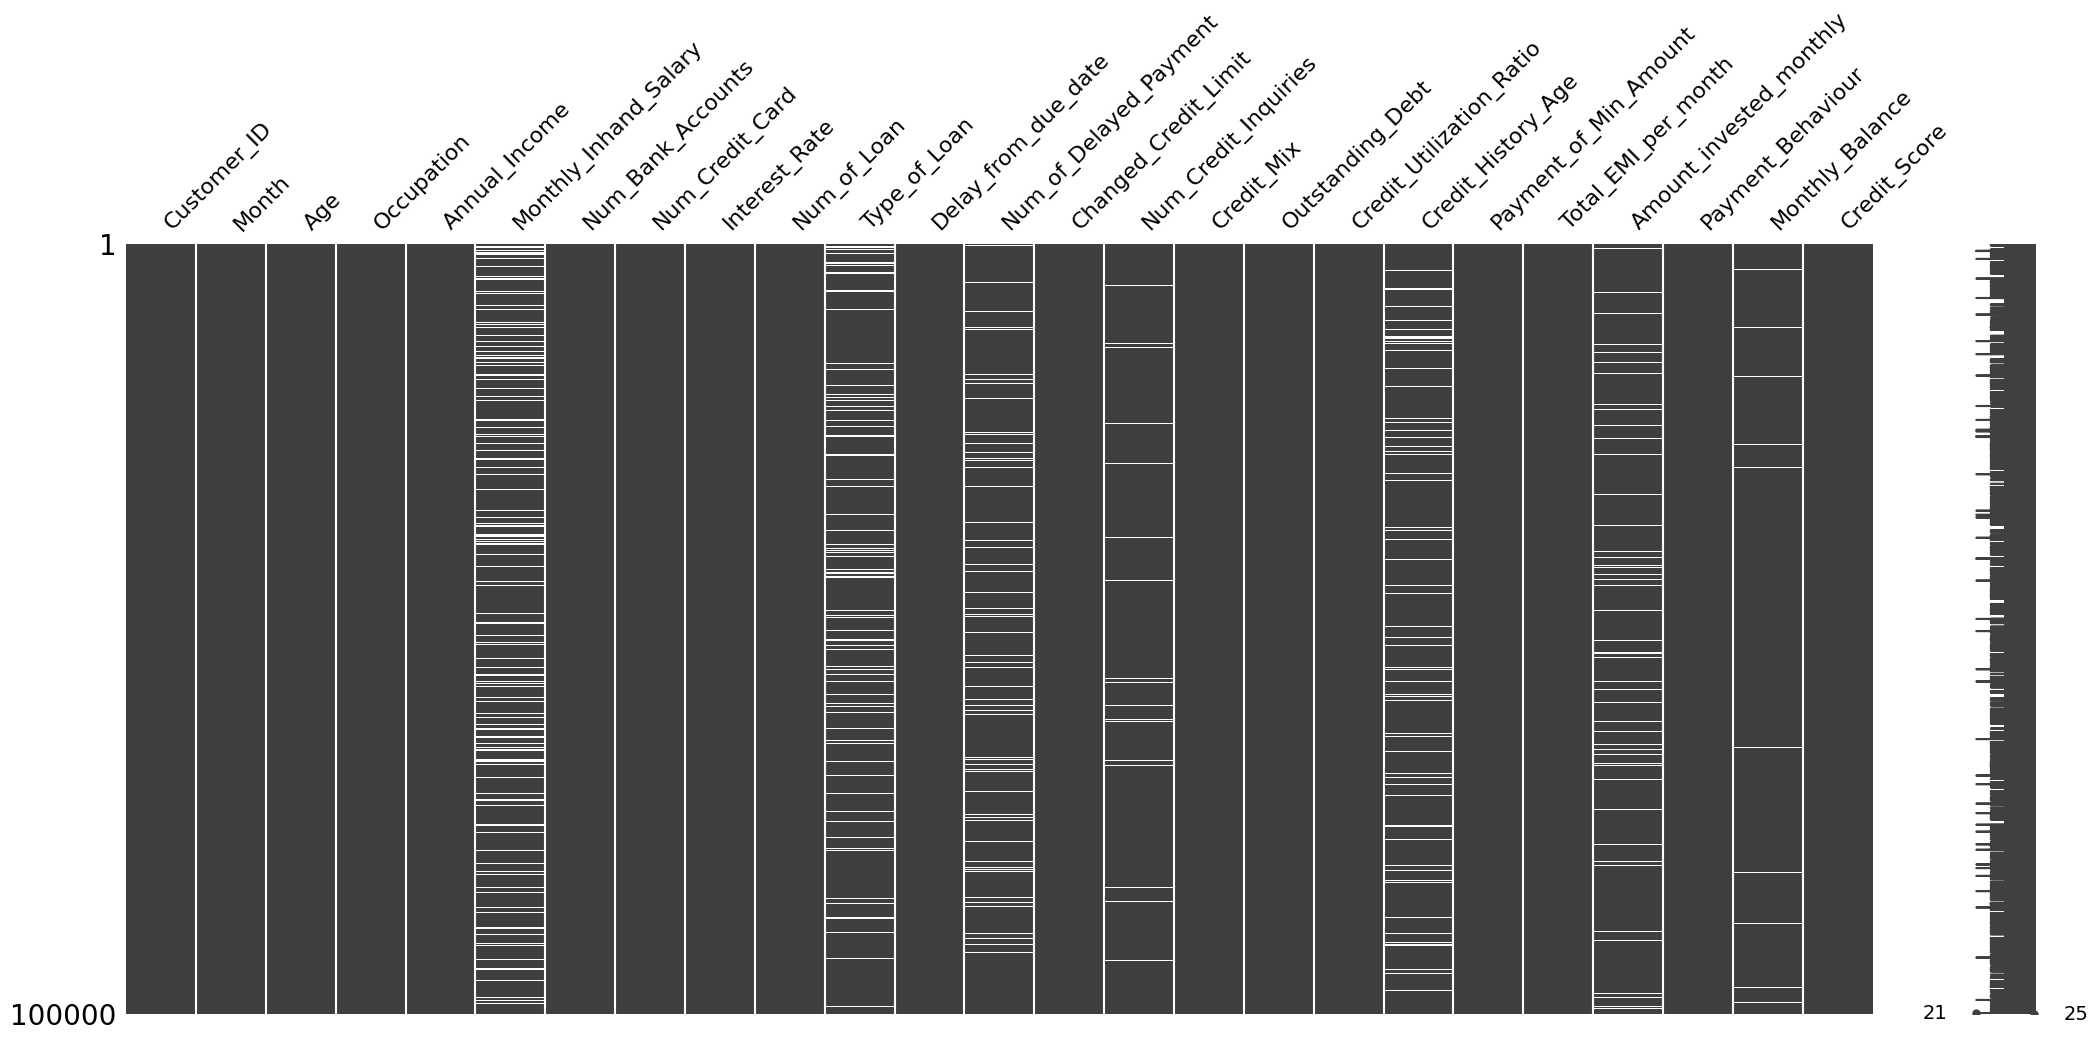

In [5]:
msno.matrix(df)

From the above data, we can see that the missing values in the data are scattered, not clustered at a single place.

### Month

In [6]:
df.Month.value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

### Monthly_Balance

In [7]:
df.Monthly_Balance.value_counts()

__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 98792, dtype: int64

In [8]:
df.loc[df.Monthly_Balance.isna(), 'Monthly_Balance'] = None

In [9]:
df.loc[df.Monthly_Balance == "__-333333333333333333333333333__", 'Monthly_Balance'] = None

### Amount_invested_monthly

In [10]:
df.Amount_invested_monthly.value_counts()

__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 91049, dtype: int64

In [11]:
df.loc[df.Amount_invested_monthly == "__10000__", 'Amount_invested_monthly'] = None

### Preprocess all columns replacing '_' and covenrting to float

In [12]:
cat = df.select_dtypes(include=["object"]).columns
cat

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Num_of_Loan', 'Type_of_Loan', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [13]:
features = [feature for feature in cat if df[feature].str.contains('_').any()]
features.remove('Customer_ID')
features

['Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Payment_Behaviour']

In [14]:
for feature in features:
    df[feature] = df[feature].str.replace("_", "")

In [15]:
num = df.select_dtypes(include=["number"]).columns
num

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')

In [16]:
features = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',
            'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly',
            'Monthly_Balance']

In [17]:
for feature in features:
    df[feature] = pd.to_numeric(df[feature]).astype('float')

### Occupation
set by hand the Occupation of Customer with all None

In [18]:
df.Occupation.value_counts()

                7062
Lawyer          6575
Architect       6355
Engineer        6350
Scientist       6299
Mechanic        6291
Accountant      6271
Developer       6235
MediaManager    6232
Teacher         6215
Entrepreneur    6174
Doctor          6087
Journalist      6085
Manager         5973
Musician        5911
Writer          5885
Name: Occupation, dtype: int64

### Outstanding_Debt

In [19]:
df['Outstanding_Debt'].value_counts()

1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: Outstanding_Debt, Length: 12203, dtype: int64

### Num_of_Loan

In [20]:
df['Num_of_Loan'].value_counts()

3.0       15104
2.0       15032
4.0       14743
0.0       10930
1.0       10606
          ...  
119.0         1
321.0         1
1439.0        1
663.0         1
966.0         1
Name: Num_of_Loan, Length: 414, dtype: int64

### Num_Bank_Accounts
Decide what to do with -1 and 0

In [21]:
df['Num_Bank_Accounts'].value_counts()

6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: Num_Bank_Accounts, Length: 943, dtype: int64

In [22]:
tmp_num_cc = df.loc[df['Num_Bank_Accounts']==-1, 'Num_Credit_Card']
tmp_num_cc.loc[55636] = 4
tmp_num_cc

30330    6
30331    6
30332    6
30333    6
30334    6
30335    6
43689    6
43690    6
43691    6
43692    6
43693    6
43694    6
43695    6
47212    3
47213    3
47214    3
47215    3
55636    4
55637    4
55638    4
55639    4
Name: Num_Credit_Card, dtype: int64

In [23]:
#df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].replace(-1, 0)

### Type of Loan

In [24]:
df['Type_of_Loan'].value_counts()

Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, Mortgage Loan,

In [25]:
df.loc[df['Type_of_Loan'].isna(), 'Num_of_Loan'].value_counts()
# i.e all zeros because all the numbers are escluded by the further filtering

 0.0       10930
-100.0       417
 50.0          2
 911.0         2
 439.0         1
           ...  
 336.0         1
 940.0         1
 1447.0        1
 881.0         1
 801.0         1
Name: Num_of_Loan, Length: 61, dtype: int64

In [26]:
df['Type_of_Loan'] = df['Type_of_Loan'].astype('object')

In [27]:
df['Type_of_Loan'].fillna('no Loan', inplace=True)

In [28]:
uniq_types = df['Type_of_Loan'].value_counts()[:10].index
uniq_types

Index(['no Loan', 'Not Specified', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [29]:
df['Type_of_Loan'].value_counts()[:10]

no Loan                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: Type_of_Loan, dtype: int64

In [30]:
df['Type_of_Loan'] = df['Type_of_Loan'].str.replace('and ', '')
df['Type_of_Loan'] = df['Type_of_Loan'].str.split(', ').apply(lambda s: " ".join(sorted(s)))

### Delay_from_due_date

In [31]:
df.loc[:, 'Delay_from_due_date':].head(8)

,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,7.0,11.27,4.0,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,Good
2,3,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
5,8,4.0,9.27,4.0,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,!@9#%8,340.479212,Good
6,3,8.0,11.27,4.0,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,LowspentSmallvaluepayments,244.565317,Good
7,3,6.0,11.27,4.0,Good,809.98,23.933795,NaN,No,49.574949,24.785217,HighspentMediumvaluepayments,358.124168,Standard


In [32]:
df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [33]:
df[df.Customer_ID == 'CUS_0x105b']

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
5800,CUS_0x105b,January,24.0,Accountant,34428.21,2575.0175,2,4,8,0.0,...,,180.7,38.400407,26 Years and 11 Months,No,0.0000,101.194589,LowspentMediumvaluepayments,436.307161,Good
5801,CUS_0x105b,February,24.0,Accountant,34428.21,2575.0175,2,4,8,0.0,...,Good,180.7,37.277277,NaN,No,0.0000,40.990554,HighspentMediumvaluepayments,466.511196,Good
5802,CUS_0x105b,March,24.0,Accountant,34428.21,2575.0175,2,1278,8,0.0,...,Good,180.7,27.419065,NaN,No,0.0000,132.356620,LowspentMediumvaluepayments,405.145130,Standard
5803,CUS_0x105b,April,24.0,Accountant,34428.21,2575.0175,2,4,8,0.0,...,Good,180.7,39.917508,27 Years and 2 Months,No,79286.0000,84.774645,HighspentSmallvaluepayments,432.727105,Good
5804,CUS_0x105b,May,24.0,Accountant,34428.21,2575.0175,2,4,8,0.0,...,Good,180.7,38.279832,27 Years and 3 Months,No,0.0000,31.633260,HighspentMediumvaluepayments,475.868490,Good
5805,CUS_0x105b,June,24.0,Accountant,34428.21,2289.5937,2,4,8,0.0,...,,180.7,25.263866,NaN,No,285.4238,119.516040,HighspentSmallvaluepayments,397.985710,Good
5806,CUS_0x105b,July,24.0,,34428.21,2289.5937,2,4,849,0.0,...,,180.7,38.320746,27 Years and 5 Months,No,285.4238,229.977234,LowspentSmallvaluepayments,317.524516,Good
5807,CUS_0x105b,August,24.0,Accountant,34428.21,2289.5937,2,4,8,0.0,...,,180.7,35.130540,27 Years and 6 Months,No,285.4238,61.131704,!@9#%8,446.370046,Good


### Num_of_Delayed_Payment
more precise filtering

In [34]:
df['Num_of_Delayed_Payment'].value_counts()

19.0      5481
17.0      5412
16.0      5312
10.0      5309
15.0      5237
          ... 
1534.0       1
3739.0       1
3313.0       1
4191.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 711, dtype: int64

In [35]:
df.loc[df['Num_of_Delayed_Payment'] > 30, 'Num_of_Delayed_Payment'] = None

<AxesSubplot:>

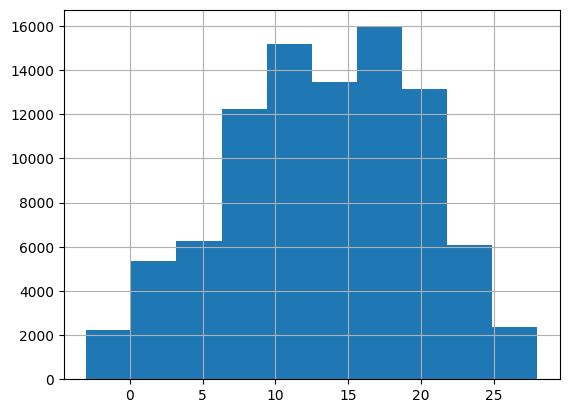

In [36]:
df.loc[df['Num_of_Delayed_Payment']<30, 'Num_of_Delayed_Payment'].hist()

In [37]:
df['Num_of_Delayed_Payment'].isna().sum()

7738

In [38]:
tmp = df[['Customer_ID', 'Num_of_Delayed_Payment']].groupby('Customer_ID')['Num_of_Delayed_Payment'].nunique()
tmp

Customer_ID
CUS_0x1000    4
CUS_0x1009    3
CUS_0x100b    3
CUS_0x1011    4
CUS_0x1013    2
             ..
CUS_0xff3     4
CUS_0xff4     3
CUS_0xff6     4
CUS_0xffc     3
CUS_0xffd     3
Name: Num_of_Delayed_Payment, Length: 12500, dtype: int64

In [39]:
tmp[tmp == 7]

Customer_ID
CUS_0x25a7    7
CUS_0x25f1    7
CUS_0x5ec     7
CUS_0x66d9    7
CUS_0x8f63    7
CUS_0xc063    7
CUS_0xc405    7
Name: Num_of_Delayed_Payment, dtype: int64

In [40]:
tmp.value_counts()

3    4644
4    3295
2    2901
5     939
1     589
6     125
7       7
Name: Num_of_Delayed_Payment, dtype: int64

### Payment_of_Min_Amount

In [41]:
df['Payment_of_Min_Amount'].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [42]:
df.replace('NM', '', inplace=True)

In [43]:
tmp_uniq = df[['Customer_ID',
    'Payment_of_Min_Amount']].groupby('Customer_ID')['Payment_of_Min_Amount'].unique()

tmp_uniq

Customer_ID
CUS_0x1000      [Yes]
CUS_0x1009    [, Yes]
CUS_0x100b     [No, ]
CUS_0x1011    [Yes, ]
CUS_0x1013     [No, ]
               ...   
CUS_0xff3        [No]
CUS_0xff4     [, Yes]
CUS_0xff6        [No]
CUS_0xffc       [Yes]
CUS_0xffd       [Yes]
Name: Payment_of_Min_Amount, Length: 12500, dtype: object

In [44]:
tmp_nuniq = df[['Customer_ID',
    'Payment_of_Min_Amount']].groupby('Customer_ID')['Payment_of_Min_Amount'].nunique()

tmp_nuniq

Customer_ID
CUS_0x1000    1
CUS_0x1009    2
CUS_0x100b    2
CUS_0x1011    2
CUS_0x1013    2
             ..
CUS_0xff3     1
CUS_0xff4     2
CUS_0xff6     1
CUS_0xffc     1
CUS_0xffd     1
Name: Payment_of_Min_Amount, Length: 12500, dtype: int64

In [45]:
np.unique(tmp_uniq[tmp_nuniq==1].to_numpy())

array([array(['No'], dtype=object), array(['Yes'], dtype=object)],
      dtype=object)

In [46]:
tmp_uniq[tmp_nuniq==2].apply(lambda x: list(x).count('')).sum()

8009

In [47]:
df.loc[df.Customer_ID == 'CUS_0x21b1', 'Payment_of_Min_Amount']

8     No
9     No
10    No
11    No
12    No
13    No
14      
15    No
Name: Payment_of_Min_Amount, dtype: object

In [48]:
df['Customer_ID'].map(tmp_uniq.apply(np.sum).to_dict()).unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df['Payment_of_Min_Amount'] = df['Customer_ID'].map(tmp_uniq.apply(np.sum).to_dict())

### Payment_Behaviour

In [50]:
df['Payment_Behaviour'].value_counts()

LowspentSmallvaluepayments      25513
HighspentMediumvaluepayments    17540
LowspentMediumvaluepayments     13861
HighspentLargevaluepayments     13721
HighspentSmallvaluepayments     11340
LowspentLargevaluepayments      10425
!@9#%8                           7600
Name: Payment_Behaviour, dtype: int64

In [51]:
df.replace('!@9#%8', None, inplace=True)

### Credit_Utilization_Ratio

In [52]:
df['Credit_Utilization_Ratio'].value_counts()

26.822620    1
28.327949    1
30.016576    1
25.478841    1
33.933755    1
            ..
30.687138    1
38.730069    1
30.017515    1
27.279794    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 100000, dtype: int64

### Changed_Credit_Limit

In [53]:
df[df['Changed_Credit_Limit'].isna()]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,CUS_0xd40,March,-500.0,Scientist,19114.120,NaN,3,4,3,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
65,CUS_0x4157,February,23.0,Doctor,114838.410,9843.867500,2,5,7,3.0,...,Good,1377.74,27.626325,21 Years and 5 Months,No,226.892792,212.235602,HighspentLargevaluepayments,785.258356,Good
66,CUS_0x4157,March,23.0,Doctor,114838.410,NaN,2,5,7,3.0,...,Good,1377.74,35.141567,21 Years and 6 Months,No,226.892792,470.385796,HighspentSmallvaluepayments,547.108162,Good
109,CUS_0x6c66,June,39.0,Manager,8701.545,519.128750,6,5,32,7.0,...,Standard,2602.69,28.570031,9 Years and 4 Months,Yes,36.548197,52.931613,LowspentMediumvaluepayments,242.433064,Poor
110,CUS_0x6c66,July,39.0,Manager,8701.545,NaN,6,5,32,7.0,...,Standard,2602.69,38.465415,NaN,Yes,36.548197,30.471806,LowspentMediumvaluepayments,264.892872,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99548,CUS_0x2637,May,28.0,Writer,29090.500,2472.208333,5,7,20,4.0,...,,1612.70,26.151395,16 Years and 2 Months,Yes,67.439731,35.401299,HighspentMediumvaluepayments,394.379803,Poor
99618,CUS_0xae66,March,7490.0,Writer,142560.360,11773.030000,6,3,13,1.0,...,Standard,220.75,35.576245,17 Years and 5 Months,No,76.772094,194.787477,HighspentLargevaluepayments,1145.743429,Standard
99800,CUS_0x1232,January,16.0,Developer,14937.490,NaN,8,8,22,7.0,...,Bad,3699.44,23.574545,13 Years and 2 Months,Yes,50.960878,97.586933,LowspentSmallvaluepayments,255.731272,Standard
99892,CUS_0x89aa,May,38.0,,85744.120,NaN,6,7,11,2.0,...,Standard,717.79,29.513156,NaN,Yes,72.099176,88.010458,HighspentLargevaluepayments,792.424699,Standard


In [54]:
df['Changed_Credit_Limit'].value_counts()

 8.22     133
 11.50    127
 11.32    126
 10.06    121
 7.35     121
         ... 
 31.56      1
 32.56      1
 20.66      1
-0.72       1
 21.17      1
Name: Changed_Credit_Limit, Length: 4375, dtype: int64

In [55]:
df['Changed_Credit_Limit'].isna().sum()

2091

In [56]:
df.loc[df['Customer_ID'] == 'CUS_0xd40', 'Changed_Credit_Limit']

0    11.27
1    11.27
2      NaN
3     6.27
4    11.27
5     9.27
6    11.27
7    11.27
Name: Changed_Credit_Limit, dtype: float64

In [57]:
tmp = df[['Customer_ID', 'Changed_Credit_Limit']].groupby('Customer_ID')['Changed_Credit_Limit'].nunique()

tmp.value_counts()

2    4714
3    3627
1    2417
4    1367
5     339
6      34
7       2
Name: Changed_Credit_Limit, dtype: int64

In [58]:
tmp[tmp==7]

Customer_ID
CUS_0x26eb    7
CUS_0x58f7    7
Name: Changed_Credit_Limit, dtype: int64

<AxesSubplot:>

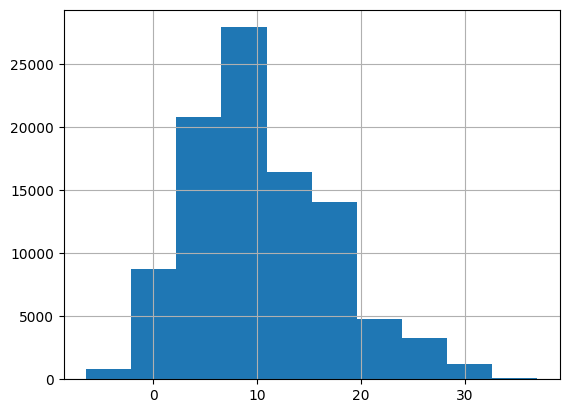

In [59]:
df['Changed_Credit_Limit'].hist()

In [60]:
df.loc[df.Customer_ID == 'CUS_0x26eb', 'Changed_Credit_Limit':]

,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
68752,3.55,2.0,,16.3,32.543879,19 Years and 9 Months,Yes,10.962585,110.145672,LowspentSmallvaluepayments,262.151618,Standard
68753,5.55,2.0,Standard,16.3,32.080428,19 Years and 10 Months,Yes,10.962585,NaN,HighspentSmallvaluepayments,320.874860,Standard
68754,0.55,2.0,,16.3,36.621015,19 Years and 11 Months,Yes,4688.000000,18.641600,HighspentLargevaluepayments,303.655690,Standard
68755,9.55,6.0,Standard,16.3,35.716700,20 Years and 0 Months,Yes,10.962585,26.368421,HighspentMediumvaluepayments,305.928869,Standard
68756,-1.45,1547.0,Standard,16.3,39.489657,20 Years and 1 Months,Yes,10.962585,48.062951,LowspentMediumvaluepayments,314.234339,Standard
68757,2.55,6.0,Standard,16.3,30.863236,20 Years and 2 Months,Yes,10.962585,114.960773,LowspentSmallvaluepayments,257.336517,Standard
68758,3.55,6.0,Standard,16.3,23.123190,20 Years and 3 Months,Yes,10.962585,90.566157,LowspentMediumvaluepayments,271.731133,Standard
68759,-0.45,6.0,Standard,16.3,35.944000,20 Years and 4 Months,Yes,10.962585,47.855005,LowspentMediumvaluepayments,314.442286,Standard


### Total_EMI_per_month

In [61]:
df['Total_EMI_per_month'].value_counts()

0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: Total_EMI_per_month, Length: 14950, dtype: int64

In [62]:
(df['Total_EMI_per_month'].value_counts()==1).sum()

3249

In [63]:
tmp = df[['Customer_ID', 'Total_EMI_per_month']].groupby('Customer_ID')['Total_EMI_per_month'].nunique()

tmp.value_counts()

1    9074
2    2950
3     446
4      26
5       4
Name: Total_EMI_per_month, dtype: int64

In [64]:
tmp[tmp == 5]

Customer_ID
CUS_0x5262    5
CUS_0x6db3    5
CUS_0x9423    5
CUS_0xc2da    5
Name: Total_EMI_per_month, dtype: int64

### Monthly_Inhand_Salary

In [65]:
df['Monthly_Inhand_Salary'].value_counts()

6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: Monthly_Inhand_Salary, Length: 13235, dtype: int64

In [66]:
tmp_group = df[['Customer_ID', 'Monthly_Inhand_Salary']].groupby('Customer_ID')['Monthly_Inhand_Salary'].nunique()

tmp_group.value_counts()

1    11754
2      746
Name: Monthly_Inhand_Salary, dtype: int64

In [67]:
df[df.Monthly_Inhand_Salary.isna()]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,Good
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,None,340.479212,Good
11,CUS_0x21b1,April,28.0,Teacher,34847.84,NaN,2,4,6,1.0,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,LowspentMediumvaluepayments,465.676224,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,CUS_0x51b3,January,33.0,MediaManager,59146.36,NaN,2,5,6,1.0,...,,418.03,34.720661,NaN,No,26.778419,606.436542,LowspentSmallvaluepayments,147.671372,Standard
99955,CUS_0x2084,April,21.0,Architect,38321.39,NaN,4,4,3,4.0,...,Good,678.57,35.455305,17 Years and 2 Months,No,362.072453,293.713193,LowspentLargevaluepayments,197.460577,Standard
99963,CUS_0x372c,April,-500.0,Lawyer,42903.79,NaN,0,4,6,1.0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,HighspentLargevaluepayments,520.662207,Standard
99975,CUS_0xf16,August,45.0,MediaManager,16680.35,NaN,1,1,5,4.0,...,Good,897.16,41.212367,NaN,No,41.113561,70.805550,LowspentLargevaluepayments,310.883806,Good


In [68]:
df[(df.Customer_ID.isin(tmp_group[tmp_group == 1].index)) & (df.Monthly_Inhand_Salary.isna())]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,Good
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
5,CUS_0xd40,June,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172,None,340.479212,Good
11,CUS_0x21b1,April,28.0,Teacher,34847.84,NaN,2,4,6,1.0,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.306228,LowspentMediumvaluepayments,465.676224,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99943,CUS_0xad4f,August,48.0,,22620.79,NaN,6,2,9,0.0,...,,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.217280,LowspentSmallvaluepayments,256.989303,Poor
99944,CUS_0x51b3,January,33.0,MediaManager,59146.36,NaN,2,5,6,1.0,...,,418.03,34.720661,NaN,No,26.778419,606.436542,LowspentSmallvaluepayments,147.671372,Standard
99963,CUS_0x372c,April,-500.0,Lawyer,42903.79,NaN,0,4,6,1.0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.193919,HighspentLargevaluepayments,520.662207,Standard
99975,CUS_0xf16,August,45.0,MediaManager,16680.35,NaN,1,1,5,4.0,...,Good,897.16,41.212367,NaN,No,41.113561,70.805550,LowspentLargevaluepayments,310.883806,Good


### Age

In [69]:
df.Age.value_counts()

38.0      2994
28.0      2968
31.0      2955
26.0      2945
32.0      2884
          ... 
1908.0       1
4583.0       1
7549.0       1
3119.0       1
1342.0       1
Name: Age, Length: 1728, dtype: int64

In [70]:
tmp = df1.loc[df1.Age == '14', ['Customer_ID', 'Credit_Mix']].groupby('Customer_ID')['Credit_Mix'].nunique()
tmp.value_counts()

2    129
1     77
Name: Credit_Mix, dtype: int64

### Credit_Mix

In [71]:
df.Credit_Mix.value_counts()

Standard    36479
Good        24337
            20195
Bad         18989
Name: Credit_Mix, dtype: int64

In [72]:
tmp_nuniq = df[['Customer_ID', 'Credit_Mix']].groupby('Customer_ID')['Credit_Mix'].nunique()
tmp_nuniq

Customer_ID
CUS_0x1000    1
CUS_0x1009    2
CUS_0x100b    2
CUS_0x1011    1
CUS_0x1013    2
             ..
CUS_0xff3     2
CUS_0xff4     2
CUS_0xff6     2
CUS_0xffc     2
CUS_0xffd     2
Name: Credit_Mix, Length: 12500, dtype: int64

In [73]:
tmp_uniq = df[['Customer_ID', 'Credit_Mix']].groupby('Customer_ID')['Credit_Mix'].unique()

print(len(tmp_uniq[tmp_nuniq==2]))
tmp_uniq[tmp_nuniq==2].apply(lambda x: list(x).count('')).sum()

10477


10477

In [74]:
tmp_uniq.apply(np.sum).unique()

array(['Bad', 'Standard', 'Good'], dtype=object)

In [75]:
df['Customer_ID'].map(tmp_uniq.apply(np.sum).to_dict()).unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [76]:
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,CUS_0xd40,February,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629162,Good
2,CUS_0xd40,March,-500.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,CUS_0xd40,April,23.0,Scientist,19114.12,NaN,3,4,3,4.0,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,CUS_0xd40,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0x942c,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
99996,CUS_0x942c,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
99997,CUS_0x942c,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2.0,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor
99998,CUS_0x942c,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2.0,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.672582,LowspentLargevaluepayments,319.164979,Standard


### Modify all the features at once

In [77]:
features_tmp = ['Age','Annual_Income', 'Num_Bank_Accounts', 'Occupation',
                'Num_Credit_Card', 'Num_of_Loan', 'Interest_Rate',
                'Outstanding_Debt', 'Total_EMI_per_month', 'Credit_Mix']

for feature in features_tmp:
    tmp = df[['Customer_ID',
               feature]].groupby('Customer_ID')[feature].apply(mode)
    df[feature] = df['Customer_ID'].map(tmp.to_dict())

In [78]:
mask1 = (df.Customer_ID.isin(tmp_group[tmp_group == 2].index.to_list()))
mask2 = (df.Monthly_Inhand_Salary.isna())

customers = df.loc[mask1 & mask2, 'Customer_ID'].unique()

customers.size

532

In [79]:
tmp = df.loc[df.Customer_ID.isin(customers),
             ['Customer_ID',
              'Monthly_Inhand_Salary']].groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(mode)

df.loc[df.Customer_ID.isin(customers),
       'Monthly_Inhand_Salary'] = df['Customer_ID'].map(tmp.to_dict())

In [80]:
df.Monthly_Inhand_Salary.isna().sum()

14145

In [81]:
df1.Monthly_Inhand_Salary.isna().sum()

15002

In [82]:
mask1 = (df.Customer_ID.isin(tmp_group[tmp_group == 1].index.to_list()))
mask2 = (df.Monthly_Inhand_Salary.isna())

customers = df.loc[mask1 & mask2, 'Customer_ID'].unique()

print(customers.size)

tmp = df.loc[df.Customer_ID.isin(customers),
             ['Customer_ID',
              'Monthly_Inhand_Salary']].groupby('Customer_ID')['Monthly_Inhand_Salary'].apply(mode)

df.loc[df.Customer_ID.isin(customers),
       'Monthly_Inhand_Salary'] = df['Customer_ID'].map(tmp.to_dict())

8567


In [83]:
df.loc[tmp_num_cc.index, 'Num_Credit_Card'] = tmp_num_cc

In [84]:
df.loc[tmp_num_cc.index, 'Num_Credit_Card'] 

30330    6
30331    6
30332    6
30333    6
30334    6
30335    6
43689    6
43690    6
43691    6
43692    6
43693    6
43694    6
43695    6
47212    3
47213    3
47214    3
47215    3
55636    4
55637    4
55638    4
55639    4
Name: Num_Credit_Card, dtype: int64

### Num_Credit_Inquiries

In [85]:
df.loc[df['Num_Credit_Inquiries'] > 20, 'Num_Credit_Inquiries'] = None

### Credit_History_Age

In [86]:
df.loc[df.Credit_History_Age.notna(), 'Credit_History_Age'] = df['Credit_History_Age'].str.extractall('(\d+)').unstack().astype(float).multiply([12, 1]).sum(axis=1)

In [87]:
df['Credit_History_Age'] = df['Credit_History_Age'].astype(float)

In [88]:
df['Credit_History_Age'].interpolate(inplace=True)

In [89]:
# in the main notebook
scale_mapper = {"Poor":0, "Standard":1, "Good":2}
df["Credit_Score"] = df["Credit_Score"].replace(scale_mapper)

In [90]:
customers = df.loc[df.Occupation == '', 'Customer_ID'].unique()
customers

array(['CUS_0x684a', 'CUS_0x11e2', 'CUS_0x1226', 'CUS_0x3243',
       'CUS_0xc2a1', 'CUS_0x3e5d', 'CUS_0x79cb', 'CUS_0xa146',
       'CUS_0x1f19', 'CUS_0x9e67'], dtype=object)

In [91]:
jobs = []
for customer in customers:
    df.loc[df.Customer_ID == customer,
           'Occupation'] = df1.loc[df1.Customer_ID == customer,
                                   'Occupation'].unique()[1]

In [92]:
df['Occupation'] = df['Occupation'].str.replace("_", "")

In [93]:
df.drop(columns='Customer_ID', inplace=True)

In [94]:
df.to_csv('../Data/train_preprocessed_type_of_loan.csv', index=False)